<a href="https://colab.research.google.com/github/AbdulazeezAde/AbdulazeezAde/blob/main/marketing_analytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-data/ifood_df.csv
/kaggle/input/marketing-data/dictionary.png


# Marketing Analytics Exploratory Data Analysis (EDA)

A Food company wants to produce the highest profit for the next direct marketing campaign, scheduled for the next month. A pilot campaign involving 2,206 customers was carried out, customers who bought the offer was clearly labeled. 

The objective for the team is to understand the characteristic features of those customers. As part of this analysis, we will explore the data

## Imports
** Import libraries used in the EDA **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ifood.csv to ifood.csv


In [ ]:
import io
df2=pd.read_csv(io.BytesIO(uploaded['ifood.csv']))

## Get the Data

We will work with the ifood_df.csv from the company. It has income, no of kids/ teens in a family, different expenses, marital & educational status.

**Next, shape of the dataframe**

In [ ]:

df2.head(5)

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,MeatProducts,FishProducts,SweetProducts,GoldProds,...,marital_status_Together,marital_status_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
df2.shape

(2205, 39)

Dataframe contains, 2205 rows and 39 columns.

**info() of the data...**

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Income                   2205 non-null   int64
 1   Kidhome                  2205 non-null   int64
 2   Teenhome                 2205 non-null   int64
 3   Recency                  2205 non-null   int64
 4   Wines                    2205 non-null   int64
 5   Fruits                   2205 non-null   int64
 6   MeatProducts             2205 non-null   int64
 7   FishProducts             2205 non-null   int64
 8   SweetProducts            2205 non-null   int64
 9   GoldProds                2205 non-null   int64
 10  DealsPurchases           2205 non-null   int64
 11  Num_ of_WebPurchases     2205 non-null   int64
 12  Num_of_CatalogPurchases  2205 non-null   int64
 13  Num_of_StorePurchases    2205 non-null   int64
 14  Num_of_WebVisits         2205 non-null   int64
 15  Acce

All the columns are of integer type except income which is of Float. All columns have non-null values as count is 2205 in each column. 

## Statistical Analysis

describe() on the data...

In [ ]:
df2.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,MeatProducts,FishProducts,SweetProducts,GoldProds,...,marital_status_Together,marital_status_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


On Average, 
1. people earned 51K with Highest income in the dataset was 114K
2. people spent 562 with highest expenses were 2491 in the dataset.

**Unique Values...**

In [ ]:
df2.nunique().sort_values(ascending=False)

Income                     1963
MntRegularProds             974
MntTotal                    897
Wines                       775
Customer_Days               662
MeatProducts                551
GoldProds                   212
FishProducts                182
SweetProducts               176
Fruits                      158
Recency                     100
Age                          56
Num_of_WebVisits             16
DealsPurchases               15
Num_ of_WebPurchases         15
Num_of_StorePurchases        14
Num_of_CatalogPurchases      13
AcceptedCmpOverall            5
Teenhome                      3
Kidhome                       3
AcceptedCmp1                  2
marital_status_Together       2
AcceptedCmp3                  2
education_PhD                 2
education_Master              2
education_Graduation          2
education_Basic               2
education_2n Cycle            2
marital_status_Widow          2
marital_status_Single         2
marital_status_Married        2
marital_

**Null Values Check.....**

In [ ]:
df2.isna().sum()

Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
Wines                      0
Fruits                     0
MeatProducts               0
FishProducts               0
SweetProducts              0
GoldProds                  0
DealsPurchases             0
Num_ of_WebPurchases       0
Num_of_CatalogPurchases    0
Num_of_StorePurchases      0
Num_of_WebVisits           0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_status_Divorced    0
marital_status_Married     0
marital_status_Single      0
marital_status_Together    0
marital_status_Widow       0
education_2n Cycle         0
education_Basic            0
education_Graduation       0
education_Mast

There is no null values in the dataset

**Duplicate Rows...**

In [ ]:
data=df2[df2.duplicated()]
print("you have {} duplicate rows".format(len(data)))

you have 184 duplicate rows


**Drop Duplicates...**

In [ ]:
# Drop 184 duplicate rows
df2.drop_duplicates(keep=False, inplace=True)

## Data Preparation

In the given data, Marital status is given in 5 different columns. Below, I merge them into one column to simplify the data structure. Below are the steps taken:

1. Converted the column to string
2. Replace '1' with numerical categorical value 
3. Make a new column, marital_status
4. Add all columns with marital status info
5. Replace categorical numerical value with string as Married, Divorced etc.

In [ ]:
#First, Change Column data type to string and then replace 1 with different number & 0 with blank.
df2['marital_status_Married']=df2['marital_status_Married'].astype(str).replace({'1':'5','0':''})
df2['marital_status_Single']=df2['marital_status_Single'].astype(str).replace({'1':'4','0':''})
df2['marital_status_Together']=df2['marital_status_Together'].astype(str).replace({'1':'3','0':''})
df2['marital_status_Widow']=df2['marital_status_Widow'].astype(str).replace({'1':'2','0':''})
df2['marital_status_Divorced']=df2['marital_status_Divorced'].astype(str).replace({'0':''})
#Now all columns contain different numbers for different marital status, lets join them in one column.
df2['marital_status']=df2["marital_status_Widow"]+df2['marital_status_Together']+df2['marital_status_Single']+df2['marital_status_Married']+df2['marital_status_Divorced']
#Next, we map numbers into different categorical values.
df2['marital_status']=df2['marital_status'].map({'1':'Divorced', '2':'Widow','3':'Together','4':'Single','5':'Married'})

Let's do same operation, as above, for education columns.

In [ ]:
df2['education_2n Cycle']=df2['education_2n Cycle'].astype(str).replace({'0':''})
df2['education_Basic']=df2['education_Basic'].astype(str).replace({'1':'2','0':''})
df2['education_Graduation']=df2['education_Graduation'].astype(str).replace({'1':'3','0':''})
df2['education_Master']=df2['education_Master'].astype(str).replace({'1':'4','0':''})
df2['education_PhD']=df2['education_PhD'].astype(str).replace({'1':'5','0':''})
df2['education_level']=df2['education_2n Cycle']+df2['education_Basic']+df2['education_Graduation']+df2['education_Master']+df2['education_PhD']
df2['education_level']=df2['education_level'].map({'1':'2n Cycle','2':'Basic','3':'Graduation','4':'Master','5':'PhD'})

for feature engineering, we join KidHome And TeenHome to find out number of children in a house

In [ ]:
df2['kids']=df2['Kidhome']+df2['Teenhome']

Next, we drop all unnecessary columns to make dataset simple.

In [ ]:
df2.drop(['education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD','marital_status_Widow','marital_status_Together','marital_status_Single','marital_status_Married','marital_status_Divorced','Kidhome','Teenhome'], axis=1)

,Income,Recency,Wines,Fruits,MeatProducts,FishProducts,SweetProducts,GoldProds,DealsPurchases,Num_ of_WebPurchases,...,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids
0,58138,58,635,88,546,172,88,88,3,8,...,11,1,63,2822,1529,1441,0,Single,Graduation,0
1,46344,38,11,1,6,2,1,6,2,1,...,11,0,66,2272,21,15,0,Single,Graduation,2
2,71613,26,426,49,127,111,21,42,1,8,...,11,0,55,2471,734,692,0,Together,Graduation,0
3,26646,26,11,4,20,10,3,5,2,2,...,11,0,36,2298,48,43,0,Together,Graduation,1
4,58293,94,173,43,118,46,27,15,5,5,...,11,0,39,2320,407,392,0,Married,PhD,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816,50,5,1,6,3,4,3,1,0,...,11,0,34,2840,19,16,0,Single,Graduation,0
2200,61223,46,709,43,182,42,118,247,2,9,...,11,0,53,2540,1094,847,0,Married,Graduation,1
2202,56981,91,908,48,217,32,12,24,1,2,...,11,0,39,2314,1217,1193,1,Divorced,Graduation,0
2203,69245,8,428,30,214,80,30,61,2,6,...,11,0,64,2315,782,721,0,Together,Master,1


with data restructure, dataset now contains 30 columns instead of 39.

# EDA & Visualizations

## Univariate Analysis
Univariate analysis is the simplest form of analysis where we explore a single variable. Univariate analysis is performed on both Numerical and categorical variables differently as plotting uses different plots.

# Customer Profile Analysis

### Categorical Variables:

Lets start with categorical variables.

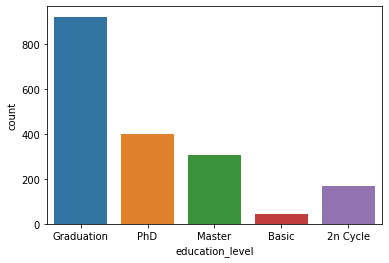

In [ ]:
sns.countplot(x="education_level", data=df2)
plt.show()

In the given dataset, people are mainly graduated followed by PHD and Master degree thats is held by very less people in comparison to number of people who are graduated.

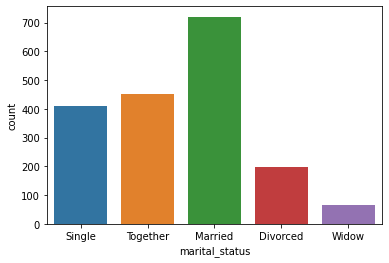

In [ ]:
sns.countplot(x="marital_status", data=df2)
plt.show()

Most of the people are Married followed by number of people who are Together and Single. There are very less people who are either divorced and widow in this dataset.

**Numerical Data:**
Analyzing Numerical data is important because understanding the distribution of features helps to further process the data. Most of the time you will find much inconsistency with numerical data so do explore numerical variables.

Let's analyze what is income distribution in our dataset. 

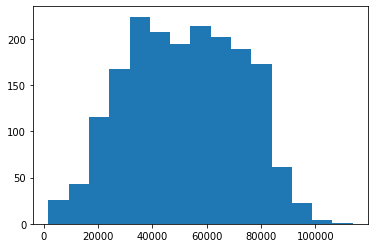

In [ ]:
plt.hist(df2["Income"], bins=15)
plt.show()

Histogram shows that most of people have income between 3000-8000. Next, we see Income distribution using box plot. Here, graph also shows if having more or less kids make any change in Income distribution. Using seaborn library, Box plot can be easily plotted.

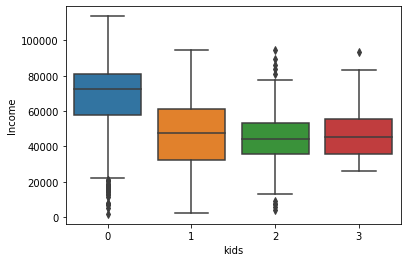

In [ ]:
sns.boxplot(y=df2["Income"], x=df2["kids"])
plt.show()

This graph shows some useful insights

1) People having no kid tend to have higher salaries then those having kids. Which is contradictory to general assumption that more kids would need more money and anyone would like to earn more 
2) As there are more kids, people have less income.e.g. people having one kid tend to earn more then those who has 2 or 3 kid

# Correlation

**Bi-Variate Analysis**
We have study about various plots to explore single categorical and numerical data. 

Now lets explore Bivariate Analysis, which is used when we have to explore the relationship between 2 different variables (Correlation) and we have to do this because, in the end, our main task is to explore the relationship between variables to build a powerful model. And when we analyze more than 2 variables together then it is known as Multivariate Analysis. we will work on different plots for Bivariate as well on Multivariate Analysis.

Below, we will see if there is any relationship between Income and expenses. We will also see if expenses are impacted with number of kids in a house.

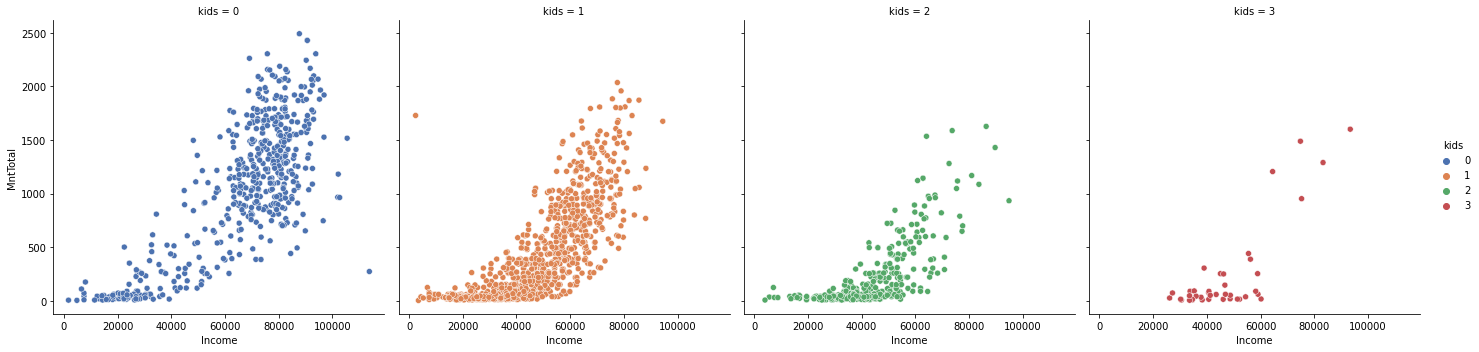

In [ ]:
# i have used seaborn relplot to plot Income and MntTotal relationship using scatter plot. 
#As I also wanted to see if this relationship changes with number of kids at home, replots allow to make subplots of a graph.
sns.relplot(x="Income", y="MntTotal", data=df2, col="kids",hue="kids", kind="scatter",palette="deep")
plt.show()

Here we see Income, total amount spent and number of kids are negatively correlated i.e. people are tend to earn more & spend a lot more when they don't have any kid. As they start having kids, expenses comes down. which makes sense. People having 3 kids, are spending way less than those having 0 or 1 kid.

Next, we will see 
1) If these people are spending on any perticular item like wine or fish or have uniform expenses in all categories
2) If having kids change priorities and habits which lead to expenses in different categories.

<ipython-input-30-621fdbbdfdac>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  expenses=df2.groupby(["kids"])["Wines","Fruits","MeatProducts","FishProducts","SweetProducts"].mean().unstack().reset_index(name="Total").rename(columns={'level_0': 'expense_type'})


[]

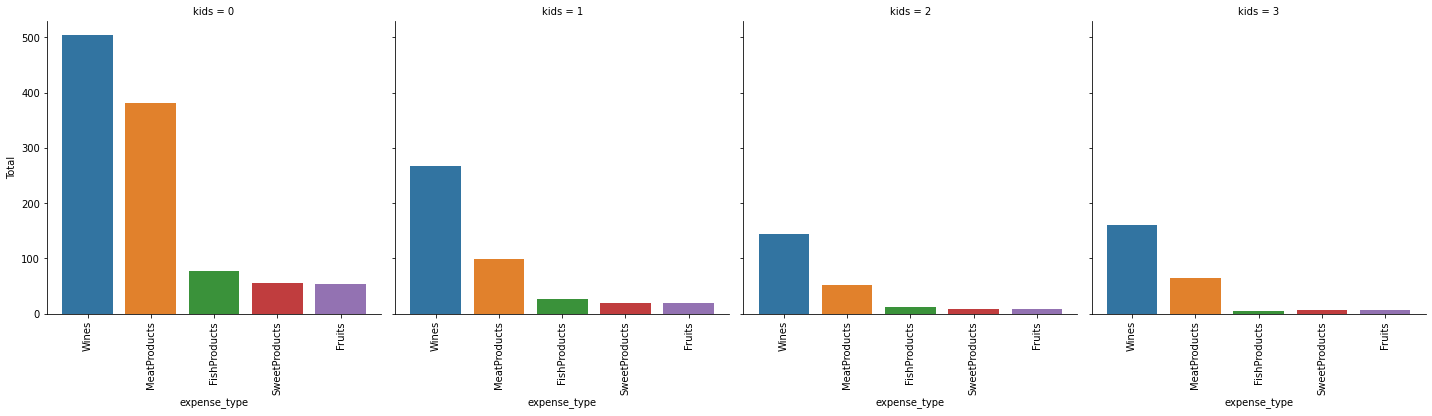

In [ ]:
# Our dataset contains these expenses in different columns, first group the items by kids and sum expenses in different category.then restructure the data to have all expenses in one column
expenses=df2.groupby(["kids"])["Wines","Fruits","MeatProducts","FishProducts","SweetProducts"].mean().unstack().reset_index(name="Total").rename(columns={'level_0': 'expense_type'})

#Here, i have used seaborn cat plot as i wanted to make subplots for number of kids.
chart=sns.catplot(data=expenses.sort_values(by="Total",ascending=False),x="expense_type",y="Total",kind="bar",legend=True, col="kids")
chart.set_xticklabels(rotation=90)
plt.plot()

here we see, everyone (with or w/o kid) tend to spend more on wine and meat products, in comparison to spending on fish, sweet, & fruits. So having a kid do not change priorities in terms of expense category. Also, as we saw before, people with 0 kid earn more, and they spend more. This also holds true in these graphs.

Above we saw, different expenses in each category of people having 0,1,2,3 kids. Now, let's compare people expenses with 0,1,2,3 kids under each expense category.

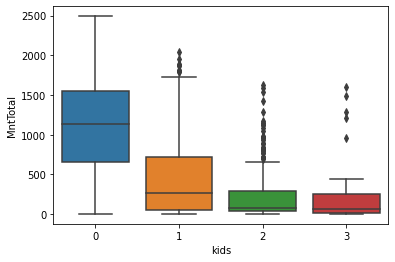

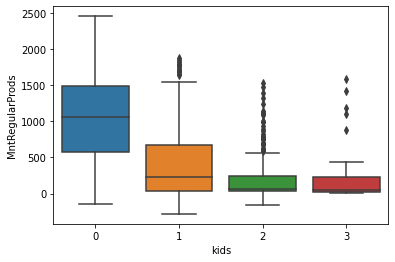

In [ ]:
for col in df2.columns:
    if 'Mnt' in col:
        sns.boxplot(x="kids", y=col, data=df2)
        plt.show()

Next, let's see who purchases deals. Are people with more kids buying more deals, as they have less income?

In order to prove that, we plot Income against NumDealsPurchases and check this distribution for each kid. 

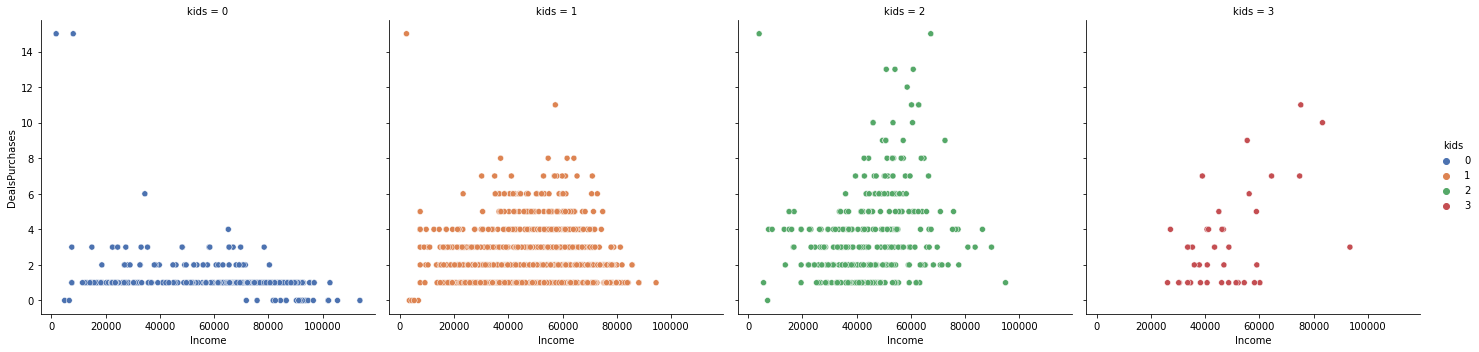

In [ ]:
# We use, seaborn rel plot in order to make subplots for number of kids.
sns.relplot(data=df2, x="Income", y="DealsPurchases", col="kids", hue="kids",palette="deep")
plt.show()

It's very interesting to see that who has 0 kid tend to buy less deals altough they earn more, spend more. On the other hand, people with 1 or 2 kid, also earn less relatively, spend less but they look out for deals. People with 3 or more kid, earn less, spend vry less and hence they also buy less deals.

Now, lets map the relation among different channels where purchases were made along with Income, Kids & number of deals bought.

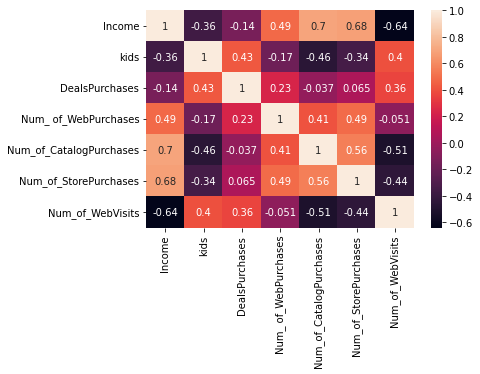

In [ ]:
#For this, we use seaborn co relation heat map to check which elements have stronger relationship & then we will plot those elements seperately to study them in detail.
df=df2[["Income","kids","DealsPurchases","Num_ of_WebPurchases","Num_of_CatalogPurchases","Num_of_StorePurchases","Num_of_WebVisits"]]
sns.heatmap(df.corr(), annot=True)

If cofficient, for any two elements, in heat map is closer to 1 then they are strongly related. Cofficient for one element against itself will always be 1. 

Next, Income is strongly related with Number of catalog and store purchases. We will plot these two to check their relationships. Above, we also noticed that people with no kids earn more and spend more on wine. Income is +vely corelated to expenses on wine, and here we see Income is also +vely corelated with catalog and store purchases, so it can be inferred that Wine is mainly purchased in stores.

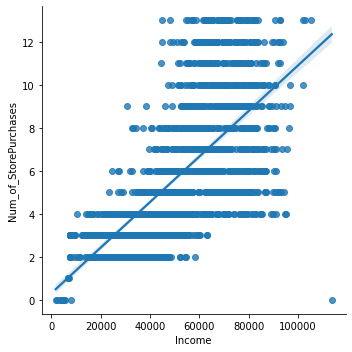

In [ ]:
sns.lmplot(data=df2, x="Income", y="Num_of_StorePurchases")
plt.show()

Graph shows, that they are postively corelated. I.e. People with higher income tend to make more store purchases.

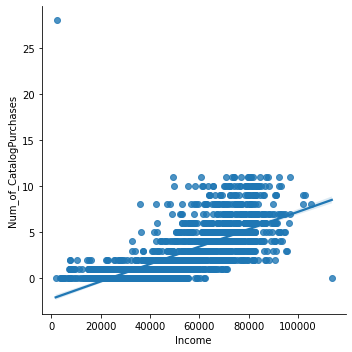

In [ ]:
sns.lmplot(data= df2, x="Income", y="Num_of_CatalogPurchases")
plt.show()

People with higher income also make more catalogue purchases.

Next, let's analyze accepted campaign & response data.

For that, we plot % of each campaign accepted and see which campaign better performed.Along with it, we also see how many people responded on last campaign.

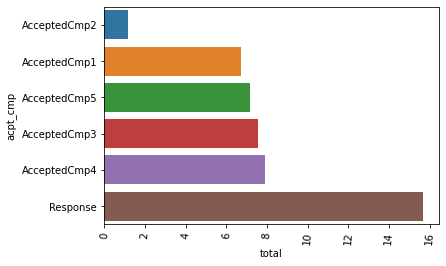

In [ ]:
##### First, we calculate the % of each campaign accepted and then we plot them in bar graph.
cmp_success=((df2[["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2", "Response"]].sum(axis=0)/ df2[["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Response"]].count(axis=0))*100).round(2).reset_index(name="total").rename(columns={'index':'acpt_cmp'}).sort_values(by="total")
sns.barplot(x="total", y="acpt_cmp", data=cmp_success)
plt.xticks(rotation=85)
plt.show()

We see, campaign 4 was accepted most however latest campaign i.e. campaign 5 was responded 15% of time.

Next, we will explore more on people who responded. First check, what is their income distribution?

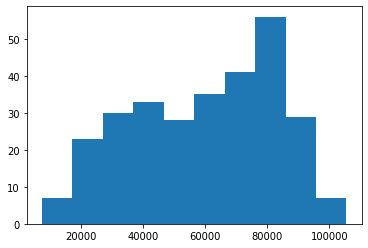

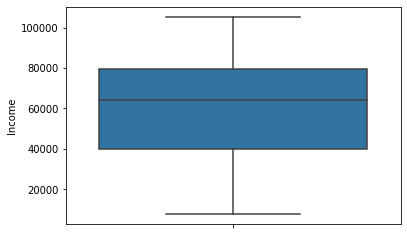

In [ ]:
plt.hist(df2[df2["Response"]==1]["Income"])
plt.show()

sns.boxplot(y=df2[df2["Response"]==1]["Income"])
plt.show()

**Histogram is right skewed** that shows people who responded, were earning higher salaries. Box plot shows that 50% people were earning higher than 60K.

Second, let's check how much they have spent on wines and if having kids change anything.

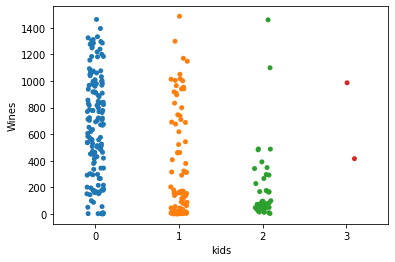

In [ ]:
⁸sns.stripplot(y=df2[df2["Response"]==1]["Wines"], x=df2[df2["Response"]==1]["kids"])
plt.show()

Next, we will check what age group people our dataset contains. For age distribution, will make Histogram.

(array([ 35., 139., 174., 353., 317., 245., 234., 204., 121.,  21.]),
 array([24. , 29.6, 35.2, 40.8, 46.4, 52. , 57.6, 63.2, 68.8, 74.4, 80. ]),
 <a list of 10 Patch objects>)

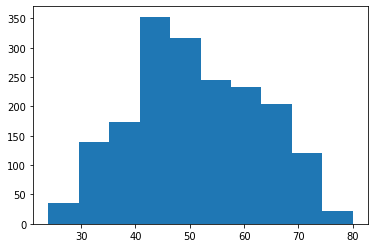

In [ ]:
plt.hist(data=df2, x="Age")